##**5.1** Load and Prepare the data:

####Pick an color image of your choice and do the following.

1. Load the image using image reading library, you can use Pillow or matplotlib or any other library of your
confidence.

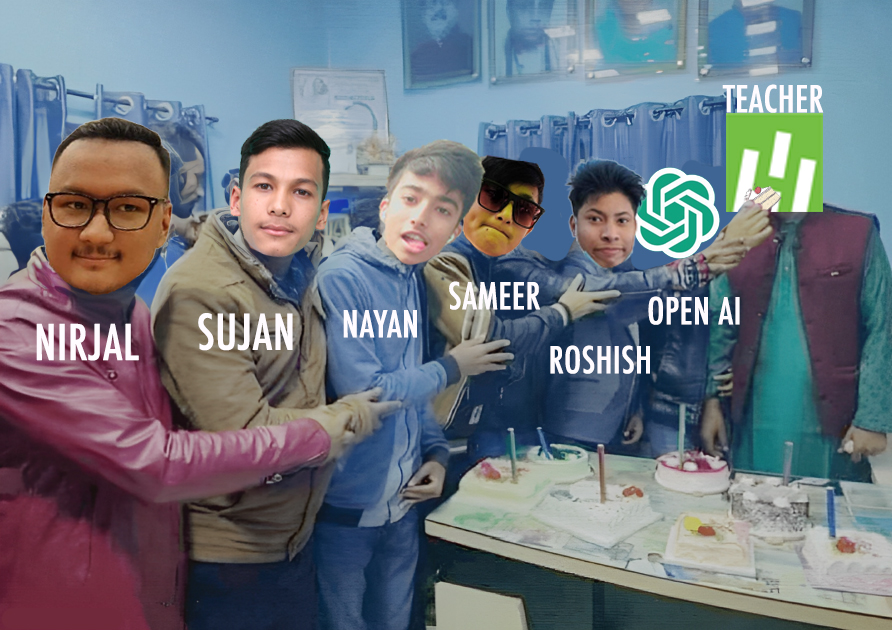

In [2]:
from PIL import Image

img = Image.open('image.jpg')
img

2. For the simplicity, convert the image into gray scale i.e. black and white.

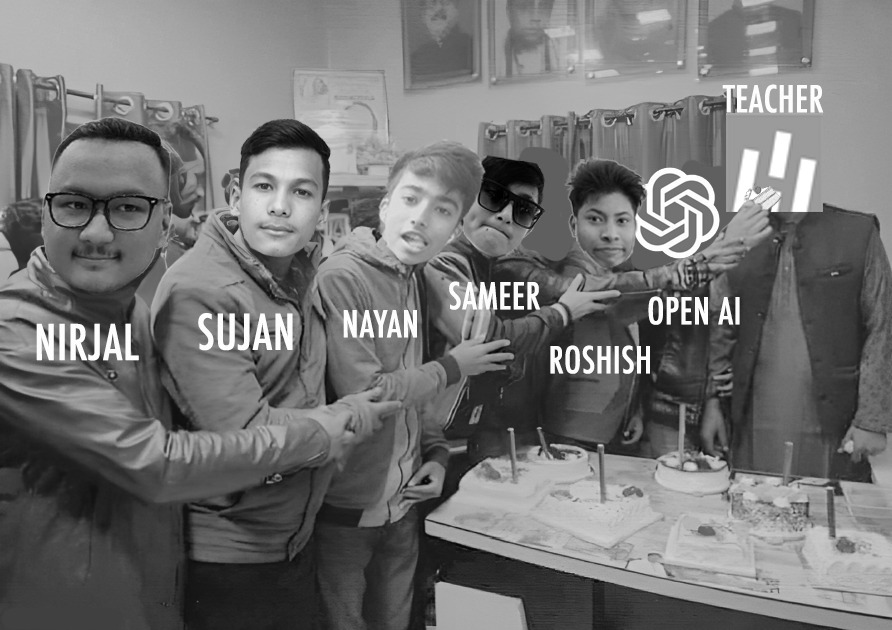

In [64]:
img_grey = img.convert('L')
img_grey

To assure all the initial variables are transformed to same scale, it is a most to perform scaling operation before
any PCA operation. For the same purpose, we will perform standardization of data, which satisfies the following
expression:
#
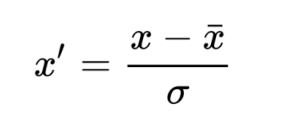

##**5.2**  Standardize/Scale the data:

In [68]:
import numpy as np

img_arr = np.array(img_grey)

mean = np.mean(img_arr, axis=0)
standard_deviation = np.std(img_arr, axis=0)

img_standardized = (img_arr - mean) / standard_deviation
print("Shape: " + str(img_standardized.shape))
print(img_standardized)

Shape: (630, 892)
[[ 1.34395065  1.33803705  1.38548931 ... -0.11239699 -0.17751019
  -0.22259668]
 [ 1.34395065  1.35675335  1.38548931 ... -0.07969025 -0.17751019
  -0.12006007]
 [ 1.32536172  1.35675335  1.36647113 ...  0.01842999 -0.04309743
  -0.0858812 ]
 ...
 [-0.90531075 -0.8892024  -0.89669196 ...  0.14925698  0.15852172
   0.11919203]
 [-0.90531075 -0.8892024  -0.91571014 ...  0.14925698  0.19212492
   0.18754978]
 [-0.86813287 -0.8892024  -0.89669196 ...  0.18196372  0.19212492
   0.18754978]]


## **5.3** Calculate Covariance Matrix:

Each element of the covariance matrix represents covariance between each ijth element. The covariance between
two elements is calculated and stored in the matrix as shown in picture below:
# 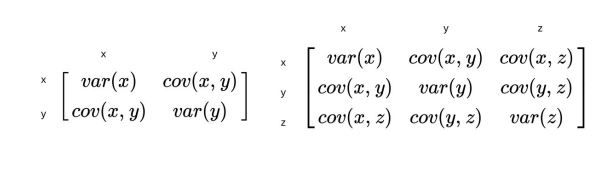

In [74]:
cov_mat = np.cov(img_standardized.T)
print('Covariance matrix \n%s' %cov_mat)

Covariance matrix 
[[ 1.00158983  0.99731545  0.98067295 ... -0.11241119 -0.10266852
  -0.0915949 ]
 [ 0.99731545  1.00158983  0.99320376 ... -0.11879599 -0.10826419
  -0.09610538]
 [ 0.98067295  0.99320376  1.00158983 ... -0.12996223 -0.11830499
  -0.10504816]
 ...
 [-0.11241119 -0.11879599 -0.12996223 ...  1.00158983  0.990761
   0.95972372]
 [-0.10266852 -0.10826419 -0.11830499 ...  0.990761    1.00158983
   0.98373816]
 [-0.0915949  -0.09610538 -0.10504816 ...  0.95972372  0.98373816
   1.00158983]]


##**5.4** Eigen Decomposition:

Decompose a covariance matrix into eigen values and eigen vectors:
# 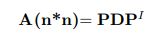

**Where:**
1. A(n*n): −Covariance Matrix.
2. P:- Eigen Vector of Covariance Matrix.
3. D:- Diagonal Matrix. Diagonal elements are Eigen Values.
4. P^I: −Inverse of Eigen Vector.

In [75]:
eig_vals, eig_vecs = np.linalg.eig(cov_mat)
print('Eigenvectors \n%s' %eig_vecs)
print('\nEigenvalues \n%s' %eig_vals)

Eigenvectors 
[[ 0.04643514+0.00000000e+00j  0.02032818+0.00000000e+00j
  -0.0008234 +0.00000000e+00j ...  0.00707018-2.06200858e-03j
  -0.00294536-1.02024783e-02j -0.00294536+1.02024783e-02j]
 [ 0.04667982+0.00000000e+00j  0.02010835+0.00000000e+00j
  -0.00015961+0.00000000e+00j ...  0.00024179-2.59042197e-04j
  -0.00028528-7.36479315e-05j -0.00028528+7.36479315e-05j]
 [ 0.04685265+0.00000000e+00j  0.02061651+0.00000000e+00j
  -0.00020746+0.00000000e+00j ...  0.00080802+8.31580730e-04j
   0.00015569+3.58438215e-04j  0.00015569-3.58438215e-04j]
 ...
 [-0.02798962+0.00000000e+00j  0.04923605+0.00000000e+00j
   0.02829082+0.00000000e+00j ...  0.00095656-8.08056272e-03j
   0.02853279-7.28879362e-03j  0.02853279+7.28879362e-03j]
 [-0.02791072+0.00000000e+00j  0.0479686 +0.00000000e+00j
   0.02812698+0.00000000e+00j ... -0.0004056 +3.96451478e-03j
   0.0001376 +6.12150523e-03j  0.0001376 -6.12150523e-03j]
 [-0.0272937 +0.00000000e+00j  0.04648682+0.00000000e+00j
   0.02802125+0.00000000e+00

##**5.5** Identify Principal Components:

Determine the **explained variance** by each **principal components**, based on this we can determine how many principal components to pick from.
*   Experiment with Principal Components:<br>
– Pick **three different combination** of principal components with various **explained variance value** and **compare** the result.

##**5.6** Reconstruction of the image:

Reconstruct the image based on number of principal components you picked in step **4.5**. Reconstruct all three images and conclude the result based on your observation. Display the reconstructed image, experiment with various number of components.